In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [33]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd407741880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd407741f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd407741520>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd407758640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd407758940>],
 'means': []}

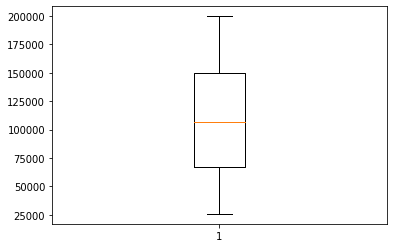

In [46]:
import matplotlib.pyplot as plt
plt.boxplot(df['population'])

In [35]:
df.rename(columns = {'Marital.Status':'mar_status', 'Taxable.Income':'Income',
                              'City.Population':'population','Work.Experience':'experience'}, inplace = True)

In [36]:
df=pd.get_dummies(df)

In [37]:
a=[]
for i in df['Income']:
    if i<=30000:
        a.append('Risk')
    else:
        a.append('Good')
a

['Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Risk',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Risk',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Risk',
 'Good',
 'Risk',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risk',
 'Good',
 'Good',
 'Good',
 'Risk',
 

In [38]:
df.columns

Index(['Income', 'population', 'experience', 'Undergrad_NO', 'Undergrad_YES',
       'mar_status_Divorced', 'mar_status_Married', 'mar_status_Single',
       'Urban_NO', 'Urban_YES'],
      dtype='object')

In [39]:
df['fraud']=a

In [40]:
x=df[['population','experience','Undergrad_NO','Undergrad_YES','mar_status_Married','mar_status_Single','Urban_YES','mar_status_Divorced','Urban_NO']]
y=df['fraud']

In [41]:
from sklearn.model_selection import train_test_split as train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)


In [43]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
model=dc.fit(x_train,y_train)

In [44]:
yp=dc.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, yp)
score

0.6733333333333333

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [50]:
selector = SelectKBest(f_classif, k=6) # k is the number of features to be selected
x_new = selector.fit_transform(x, y)


In [56]:
print('feature importance: ', selector.scores_)

feature importance:  [0.08938331 0.00232621 0.09379577 0.09379577 1.11694249 0.14969326
 0.01394906 0.43998076 0.01394906]


In [65]:
#x1=df[['population','Undergrad_NO','Undergrad_YES','mar_status_Married','mar_status_Single','mar_status_Divorced']]
#x=df[['population','experience','Undergrad_NO','Undergrad_YES','mar_status_Married','mar_status_Single','Urban_YES','mar_status_Divorced','Urban_NO']]
x1=df[['Undergrad_NO','Undergrad_YES','mar_status_Married','mar_status_Single','mar_status_Divorced']]
y1=df['fraud']

In [66]:
from sklearn.model_selection import train_test_split as train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1)

In [67]:
x1_train=ss.fit_transform(x1_train)
x1_test=ss.transform(x1_test)

In [68]:
model1=dc.fit(x1_train,y1_train)

In [69]:
yp1=dc.predict(x1_test)

In [70]:
score1 = accuracy_score(y1_test, yp1)
score1

0.84